Using the shot chart avaialable for each nba player via the nba api to create a machine learning routine that should be capable of predicting whether or not a basket will go in.

Variables include position, coverage, and time. 

In [3]:
from nba_py import player
import numpy as np
import pandas as pd
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
np.random.seed(4)  #replication purposes.
import matplotlib.pyplot as plt
%matplotlib inline

height has been deprecated.



In [4]:
def get_PID(first_name,last_name):
    """Obtains the player ID number of the desired player.
    
    Parameters
    -----------
    
    first_name: str
        First name of player
    last_name: str
        Last name of player
    
    Returns
    -------
    
    ID : float
        The player's ID number. 
    """
    
    playa = player.get_player(first_name=first_name,last_name=last_name)
    
    return playa.values[0]

In [3]:
dinwiddie = get_PID('Spencer','Dinwiddie')

In [4]:
from nba_py import shotchart

In [5]:
def get_shotchart(PID):
    """Returns a dataframe of the shotchart.
    """
    chart = shotchart.ShotChart(PID)
    chartdf = chart.shot_chart()
    
  #  importantstuff = chartdf[['LOC_X','LOC_Y','SHOT_DISTANCE','ACTION_TYPE','EVENT_TYPE']].copy()   #['LOC_X','LOC_Y','EVENT_TYPE']
    importantstuff = chartdf[['LOC_X','LOC_Y','ACTION_TYPE','EVENT_TYPE']].copy()
    importantstuff = pd.get_dummies(importantstuff)
    return importantstuff

In [31]:
spencertable = get_shotchart(dinwiddie)

In [32]:
spencertable

,LOC_X,LOC_Y,ACTION_TYPE_Alley Oop Layup shot,ACTION_TYPE_Cutting Layup Shot,ACTION_TYPE_Driving Dunk Shot,ACTION_TYPE_Driving Finger Roll Layup Shot,ACTION_TYPE_Driving Floating Bank Jump Shot,ACTION_TYPE_Driving Floating Jump Shot,ACTION_TYPE_Driving Layup Shot,ACTION_TYPE_Driving Reverse Layup Shot,ACTION_TYPE_Fadeaway Jump Shot,ACTION_TYPE_Floating Jump shot,ACTION_TYPE_Jump Bank Shot,ACTION_TYPE_Jump Shot,ACTION_TYPE_Layup Shot,ACTION_TYPE_Pullup Jump shot,ACTION_TYPE_Putback Layup Shot,ACTION_TYPE_Reverse Layup Shot,ACTION_TYPE_Running Dunk Shot,ACTION_TYPE_Running Finger Roll Layup Shot,ACTION_TYPE_Running Jump Shot,ACTION_TYPE_Running Layup Shot,ACTION_TYPE_Running Pull-Up Jump Shot,ACTION_TYPE_Step Back Jump shot,ACTION_TYPE_Tip Layup Shot,ACTION_TYPE_Turnaround Fadeaway shot,ACTION_TYPE_Turnaround Hook Shot,ACTION_TYPE_Turnaround Jump Shot,EVENT_TYPE_Made Shot,EVENT_TYPE_Missed Shot
0,101,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,147,17,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,119,243,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
6,4,244,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,158,257,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,42,104,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,-1,-3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [23]:
makes = spencertable.loc[spencertable['EVENT_TYPE_Missed Shot'] == 0]
misses = spencertable.loc[spencertable['EVENT_TYPE_Missed Shot'] == 1]
makepos = makes[['LOC_X','LOC_Y']].values
xmade = makes['LOC_X'].values
ymade = makes['LOC_Y'].values
xmissed = misses['LOC_X'].values
ymissed = misses['LOC_Y'].values
missespos = misses[['LOC_X','LOC_Y']].values

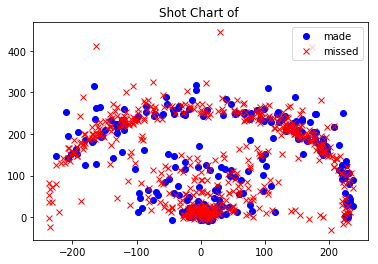

In [30]:
plt.plot(xmade,ymade,'bo',label = 'made')
plt.plot(xmissed,ymissed,'rx',label = 'missed')
plt.title("Shot Chart of " + str())
plt.legend()

In [10]:
from sklearn import preprocessing, cross_validation, neighbors


/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
y = spencertable[['EVENT_TYPE_Made Shot','EVENT_TYPE_Missed Shot']].values

del spencertable['EVENT_TYPE_Made Shot'],spencertable['EVENT_TYPE_Missed Shot']

In [12]:
X = spencertable.values

In [13]:
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,y,test_size=0.2)


In [14]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:

accuracy = clf.score(X_test,y_test)
print(accuracy)

0.6785714285714286
